In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = True
%load_ext kedro.extras.extensions.ipython

[11/17/25 10:08:57] WARNING  C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\extras\extens ]8;id=983238;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py\warnings.py]8;;\:]8;id=505030;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py#109\109]8;;\
                             ions\ipython.py:19: KedroDeprecationWarning:                                          
                             kedro.extras.extensions.ipython should be accessed only using the                     
                             alias kedro.ipython. The unaliased name will be removed in Kedro                      
                             0.19.0.                                                                               
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Resolved project path as: C:\dev\phd.                                  ]8;id=6897;file://C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=689487;file://C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\ipython\__init__.py#139\139]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    WARNING  C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\framework\sta ]8;id=146208;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py\warnings.py]8;;\:]8;id=495280;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py#109\109]8;;\
                             rtup.py:99: KedroDeprecationWarning: project_version in pyproject.toml                
                             is deprecated, use kedro_init_version instead                                         
                               warnings.warn(                                                                      
                                                                                                                   

[11/17/25 10:08:59] WARNING  C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\io\partitione ]8;id=830606;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py\warnings.py]8;;\:]8;id=159915;file://C:\Users\maa\micromamba\envs\phd\lib\warnings.py#109\109]8;;\
                             d_dataset.py:200: KedroDeprecationWarning: 'PartitionedDataset' has                   
                             been moved to `kedro-datasets` and will be removed in Kedro 0.19.0.                   
                               warnings.warn(                                                                      
                                                                                                                   

[11/17/25 10:09:00] INFO     Kedro project phd                                                      ]8;id=863649;file://C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=413891;file://C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\ipython\__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=659621;file://C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=163409;file://C:\Users\maa\micromamba\envs\phd\lib\site-packages\kedro\ipython\__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [138]:
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
import numpy as np
import yaml

from vessel_manoeuvring_models.visualization.plot import track_plot, plot
from phd.visualization.plot_ship import track_plots
from sklearn.metrics import mean_squared_error
import sympy as sp
from functools import reduce
from operator import add
from vessel_manoeuvring_models.symbols import *
import vessel_manoeuvring_models.symbols as symbols
from IPython.display import display
from vessel_manoeuvring_models.prime_system import df_prime
from vessel_manoeuvring_models.substitute_dynamic_symbols import run, lambdify, get_function_subs
from phd.helpers import mean
from vessel_manoeuvring_models.angles import mean_angle
from vessel_manoeuvring_models.angles import smallest_signed_angle
import inspect
from phd.visualization.plot_prediction import plot_total_force, plot_force_components
from scipy.optimize import least_squares
from vessel_manoeuvring_models.models.diff_eq_to_matrix import DiffEqToMatrix
from vessel_manoeuvring_models.prime_system import PrimeSystem, df_prime, prime_eq_to_SI_eq
import statsmodels.api as sm
import logging
log = logging.getLogger(__name__)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)

import seaborn as sns
from phd.visualization.maps import plot_map, plot_trips, plot_missions
from phd.helpers import derivative
from vessel_manoeuvring_models.data.lowpass_filter import lowpass_filter
from vessel_manoeuvring_models.KF_multiple_sensors import KalmanFilter
from vessel_manoeuvring_models.prime_system import get_denominator
from vessel_manoeuvring_models.parameters import df_parameters
p = df_parameters['symbol']
from vessel_manoeuvring_models.substitute_dynamic_symbols import lambdify, run, expression_to_python_method, equation_to_python_method
from vessel_manoeuvring_models.models.modular_simulator import subs_simpler
from sympy.matrices.immutable import ImmutableDenseMatrix
from sympy import Eq
#from vessel_manoeuvring_models.EKF_multiple_sensors import ExtendedKalmanFilter, update_gradient
import phd.pipelines.load_wPCC.reference_frames as reference_frames
import phd.pipelines.load_wPCC.accelerometers6 as accelerometers6
from phd.pipelines.filter.nodes import lowpass
import sympy.physics.mechanics as me
from phd.paper.equation import eq_dottify
import sys
from pathlib import Path

# Add parent folder to Python path
sys.path.insert(0, str(Path.cwd().parent))

#from load_data import load, filter, calculate_accelerometer_corrections, accelerometers_to_origo, calculated_accelerometer, plot_accelerations, plot_accelerometers, acc
from phd.pipelines.load_wPCC.reference_frames import *
from sympy import Eq
from sympy import Matrix, print_latex
from accelerometers import acc
from sympy.physics.vector.vector import Vector

## Linearized equations

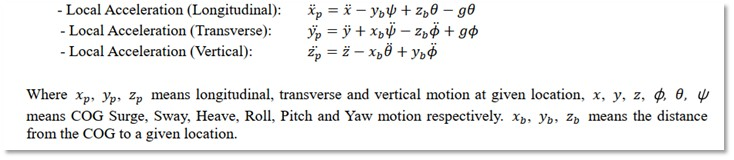

In [182]:
#x2d_0,y2d_0,z2d_0 = symbols(r"\ddot{x}_{0},\ddot{y}_{0},\ddot{z}_{0}")
#eq_x2d_P = Eq(x2d_P, x2d_0 - y_P*r1d + z_P*p1d - g*phi_)
#eq_y2d_P = Eq(y2d_P, y2d_0 + x_P*r1d - z_P*p1d + g*phi_)
#eq_z2d_P = Eq(z2d_P, z2d_0 - x_P*q1d + y_P*p1d)

w = symbols("w")
w1d = symbols(r"\dot{w}")

eq_x2d_P = Eq(x2d_P, u1d - y_P*r1d + z_P*q1d - g*theta_)
eq_y2d_P = Eq(y2d_P, v1d + x_P*r1d - z_P*p1d + g*phi_)
eq_z2d_P = Eq(z2d_P, w1d - x_P*q1d + y_P*p1d)

display(eq_x2d_P)
display(eq_y2d_P)
display(eq_z2d_P)

subs={
    u1d:'u1d',
    v1d:'v1d',
    w1d: 'w1d',
    r1d:'r1d',
    p1d:'p1d',
    q1d:'q1d',
    phi_:"phi",
    theta_:"theta", 
    #x2d_0:"x2d_0",
    #y2d_0:"y2d_0",
    #z2d_0:"z2d_0",  
    x2d_P:"z2d_P",
    y2d_P:"z2d_P",
    z2d_P:"z2d_P",
}

lambda_x2d_P = expression_to_python_method(eq_x2d_P.rhs.subs(subs), function_name='x2d_P')
lambda_y2d_P = expression_to_python_method(eq_y2d_P.rhs.subs(subs), function_name='y2d_P')
lambda_z2d_P = expression_to_python_method(eq_z2d_P.rhs.subs(subs), function_name='z2d_P')


Eq(\ddot{x}_{P}, \dot{q}*z_P - \dot{r}*y_P + \dot{u} - \theta*g)

Eq(\ddot{y}_{P}, -\dot{p}*z_P + \dot{r}*x_P + \dot{v} + \phi*g)

Eq(\ddot{z}_{P}, \dot{p}*y_P - \dot{q}*x_P + \dot{w})

In [183]:
linearizations = [
    (phi_,0),
    (theta_,0),
    (p*q,0),
    (p*r,0),
    (p**2,0),
    (q**2,0),
    (r**2,0),
    (r*v_,0),
    (p*v_,0),
    (r*u_,0),
    (q*r,0),
    (q*u_,0),
    (q*v_,0),
]
linearizations2 = [
    (sp.cos(theta_),1),
    (sp.sin(theta_),theta_),
    (sp.sin(phi_),phi_),
    (sp.cos(phi_),1),
    
]


linearized_expression = (sp.Matrix([(sp.factor(expression[0]).subs(linearizations)),
(sp.factor(expression[1]).subs(linearizations)),
(sp.factor(expression[2]).subs(linearizations))]) + gravity.express(B).to_matrix(B) + sp.ImmutableDenseMatrix([0, 0, g])).subs(subs_removing_dynamic_symbols).subs(linearizations2)

In [184]:
linearized_expression


Matrix([
[\dot{q}*z_P - \dot{r}*y_P + \dot{u} + \theta*g],
[ -\dot{p}*z_P + \dot{r}*x_P + \dot{v} - \phi*g],
[                     \dot{p}*y_P - \dot{q}*x_P]])

In [185]:
g_ = 9.81
meta_data = {
    'x_P' : 10,
    'y_P' : 1,
    'z_P' : 1,
    'g' : g_
}

In [197]:
T = 10 
t = np.arange(0,T,0.1)
data = pd.DataFrame(index=t)
data [['u','v','w']] = 0
data [['p','q','r']] = 0
data [['u1d','v1d','w1d']] = 0
data [['phi','theta',]] = 0
data [['p1d','q1d','r1d']] = 0


omega_u = 2*np.pi / T 
u_A = 1
data ['u1d'] = u_A*np.sin(omega_u*t)

omega_v = 2*2*np.pi / T 
v_A = 2
data ['v1d'] = v_A*np.sin(omega_v*t)

omega_r = 4*2*np.pi / T 
r_A = np.deg2rad(45)
data ['r'] = r_A*np.sin(omega_r*t)
data ['r1d'] = omega_r*r_A*np.cos(omega_r*t)

omega_phi = 8*2*np.pi / T 
phi_A = np.deg2rad(10)
data ['phi'] = phi_A*np.sin(omega_phi*t)
data ['r1d'] = omega_phi*phi_A*np.cos(omega_phi*t)


In [198]:
df_result = data.copy()

df_result['x2d_P'] = reference_frames.lambda_x2d_P(**data,**meta_data)
df_result['y2d_P'] = reference_frames.lambda_y2d_P(**data,**meta_data)
df_result['z2d_P'] = reference_frames.lambda_z2d_P(**data,**meta_data)

df_linearized = data.copy()

df_linearized['x2d_P'] = lambda_x2d_P(**data,**meta_data)
df_linearized['y2d_P'] = lambda_y2d_P(**data,**meta_data)
df_linearized['z2d_P'] = lambda_z2d_P(**data,**meta_data)



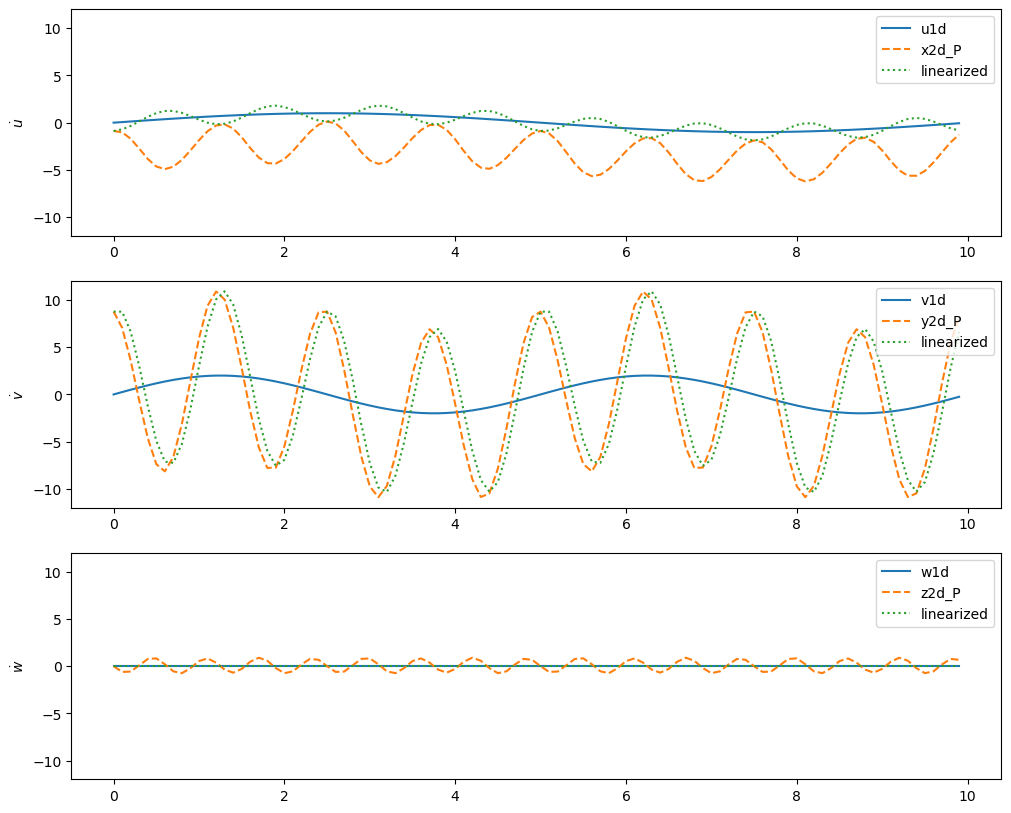

In [204]:
fig,axes=plt.subplots(nrows=3)

ax=axes[0]
df_result.plot(y=['u1d','x2d_P'], style=['-','--'], ax=ax)
df_linearized.plot(y='x2d_P', style=':', label='linearized', ax=ax)
ax.set_ylabel(r'$\dot{u}$')

ax=axes[1]
df_result.plot(y=['v1d','y2d_P'], style=['-','--'], ax=ax)
df_linearized.plot(y='y2d_P', style=':', label='linearized', ax=ax)
ax.set_ylabel(r'$\dot{v}$')

ax=axes[2]
df_result.plot(y=['w1d','z2d_P'], style=['-','--'], ax=ax)
df_linearized.plot(y='z2d_P', style=':', label='linearized', ax=ax)
ax.set_ylabel(r'$\dot{w}$')

ylims = np.array([ax.get_ylim() for ax in axes])
ylim = [np.min(ylims[:,0]), np.max(ylims[:,1])]
for ax in axes:
    ax.set_ylim(ylim)


In [205]:
point1 = [
1.625,
0.025,
-0.564,
]
point2 = [
-1.9,
0.43,
-0.564,
]
point3 = [
-1.9,
-0.43,
-0.564,
]

In [206]:
df_accelerometers = data.copy()
df_accelerometers['xacc1'] = lambda_x2d_P(**data, x_P=point1[0], y_P=point1[1], z_P= point1[2], g=g_)
df_accelerometers['yacc1'] = lambda_y2d_P(**data, x_P=point1[0], y_P=point1[1], z_P= point1[2], g=g_)
df_accelerometers['zacc1'] = lambda_z2d_P(**data, x_P=point1[0], y_P=point1[1], z_P= point1[2], g=g_)

df_accelerometers['yacc2'] = lambda_y2d_P(**data, x_P=point2[0], y_P=point2[1], z_P= point2[2], g=g_)
df_accelerometers['zacc2'] = lambda_z2d_P(**data, x_P=point2[0], y_P=point2[1], z_P= point2[2], g=g_)

df_accelerometers['zacc3'] = lambda_z2d_P(**data, x_P=point3[0], y_P=point3[1], z_P= point3[2], g=g_)

In [207]:
df_accelerometers[['x2d_P','y2d_P','z2d_P',]] = acc(**df_accelerometers, point1=point1, point2=point2, point3=point3, xco=meta_data['x_P'], yco=meta_data['y_P'], zco=meta_data['z_P']).transpose()

Text(0, 0.5, '$\\dot{w}$')

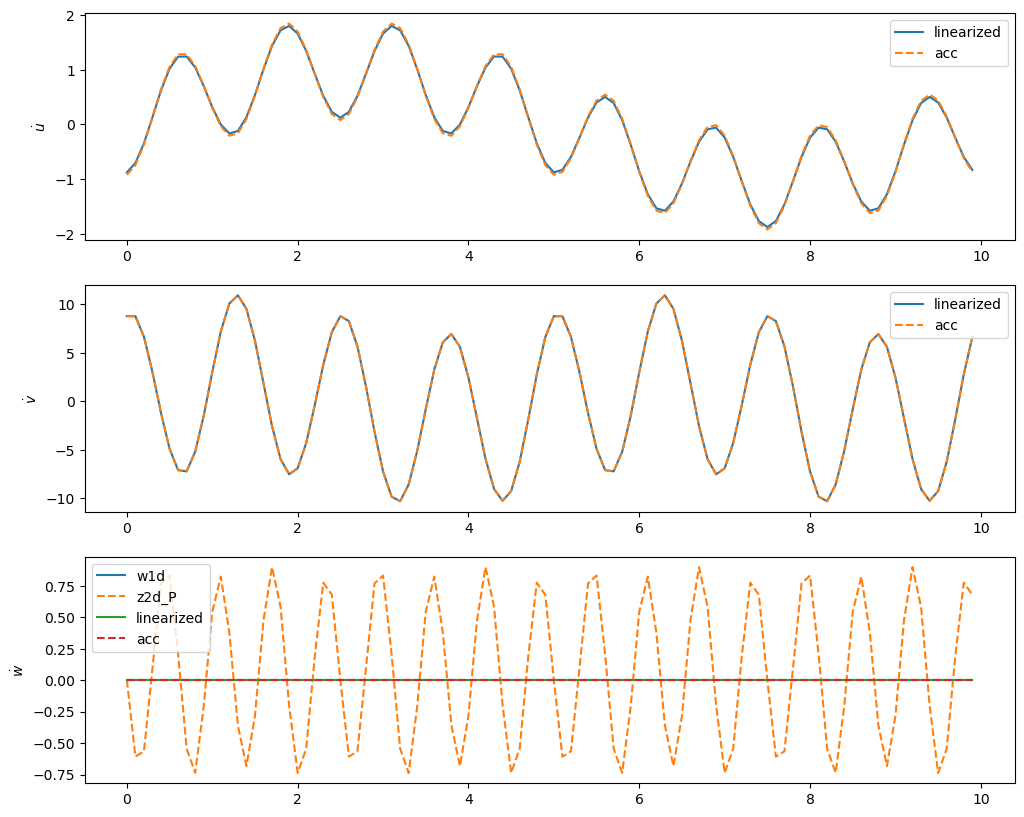

In [208]:
fig,axes=plt.subplots(nrows=3)

ax=axes[0]
#df_result.plot(y='x2d_P', style='-', ax=ax)
df_linearized.plot(y='x2d_P', style='-', label='linearized', ax=ax)
df_accelerometers.plot(y='x2d_P', style='--', label='acc', ax=ax)
ax.set_ylabel(r'$\dot{u}$')

ax=axes[1]
#df_result.plot(y=['v1d','y2d_P'], style=['-','--'], ax=ax)
df_linearized.plot(y='y2d_P', style='-', label='linearized', ax=ax)
df_accelerometers.plot(y='y2d_P', style='--', label='acc', ax=ax)
ax.set_ylabel(r'$\dot{v}$')

ax=axes[2]
df_result.plot(y=['w1d','z2d_P'], style=['-','--'], ax=ax)
df_linearized.plot(y='z2d_P', style='-', label='linearized', ax=ax)
df_accelerometers.plot(y='z2d_P', style='--', label='acc', ax=ax)
ax.set_ylabel(r'$\dot{w}$')